<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Day_2/02_MLP/02_MLP_pckg.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  Multi-layer perceptron            #
###############################################

In [ ]:
# Libraries
import numpy as np                       # Numerical array operations
import pandas as pd                      # Data manipulation/analysis
import matplotlib.pyplot as plt          # Data plotting/visualization
import tensorflow as tf                  # Machine learning

In [ ]:
# Load dataset
# Path to dataset
path = 'https://raw.githubusercontent.com/fernandoarcevega/AI_Workshop/main/datasets/spirals3.csv'
T = pd.read_csv(path)
data = T.values
n, d = data.shape
X = data[:, :d-1]      # Features
Y = data[:, d-1] - 1   # Class labels

In [ ]:
# Check feature and targets shapes
print(f'Features shape: {X.shape}')
print(f'Targets shape:  {Y.shape}')

Features shape: (1350, 2)
Targets shape:  (1350,)


Text(0.5, 1.0, 'XOR problem')

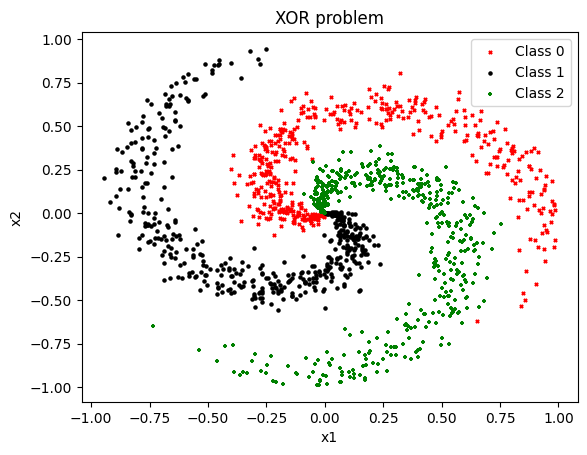

In [ ]:
# Plotting training data
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red', s=5, marker='x', label='Class 0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='black', s=5, marker='o', label='Class 1')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], color='green', s=5, marker='+', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('XOR problem')

Training **MLP** with **backpropagation**:

$$
\begin{align*}
& \textbf{input:} \quad X = \{(\mathbf{x}_i, \mathbf{t}_i) | i = 1, \dots, n\}, \eta > 0, \varepsilon > 0, r_{\max} \\
\\
1: \quad & \text{Initialize network weights: } w_{ji} \leftarrow \text{rand}, w_{kj} \leftarrow \text{rand} \\
2: \quad & \textbf{for } r = 1, 2, \dots, r_{\max} \textbf{ do} \\
3: \quad & \qquad \Delta w_{ji} \leftarrow 0, \Delta w_{kj} \leftarrow 0 \\
4: \quad & \qquad \textbf{for } l = 1, 2, \dots, n \textbf{ do} \\
5: \quad & \qquad \qquad z_k = \text{MLP}(\mathbf{x}_l) && \triangleright \text{Feedforward} \\
6: \quad & \qquad \qquad \Delta w_{ji} \leftarrow \Delta w_{ji} + \eta \delta_j x_{li} && \triangleright \text{Delta rules} \\
7: \quad & \qquad \qquad \Delta w_{kj} \leftarrow \Delta w_{kj} + \eta \delta_k y_j \\
8: \quad & \qquad w_{ji} \leftarrow w_{ji} - \Delta w_{ji} && \triangleright \text{Weights update} \\
9: \quad & \qquad w_{kj} \leftarrow w_{kj} - \Delta w_{kj} \\
\\
& \textbf{return:} \quad w_{ji}, w_{kj}
\end{align*}
$$

In [ ]:
def mlp(X, y, h, eta, lam, epochMax):
    # Model
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(
        units=h,
        activation='relu',
        kernel_initializer=tf.keras.initializers.LecunNormal(),
        kernel_regularizer=tf.keras.regularizers.l2(lam)),   # L2 regularization

    tf.keras.layers.Dense(
        units=3,
        activation='softmax',
        kernel_initializer=tf.keras.initializers.LecunNormal(),
        kernel_regularizer=tf.keras.regularizers.l2(lam))])   # L2 regularization

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=eta)

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    # Training model
    history = model.fit(X, y,
                    batch_size = 256,
                    epochs = epochMax,
                    verbose = 2)
    return model, history

In [ ]:
# Hyper-parameters
h = 15               # Hidden neurons
epochMax = 300      # Number of training epochs
eta = 1e-3           # Learning rate
lam = 1e-4           # Regularization factor

model, history = mlp(X, Y, h, eta, lam, epochMax)

Epoch 1/300
6/6 - 2s - 294ms/step - accuracy: 0.3726 - loss: 1.0796
Epoch 2/300
6/6 - 0s - 8ms/step - accuracy: 0.3667 - loss: 1.0669
Epoch 3/300
6/6 - 0s - 9ms/step - accuracy: 0.3600 - loss: 1.0550
Epoch 4/300
6/6 - 0s - 8ms/step - accuracy: 0.3644 - loss: 1.0435
Epoch 5/300
6/6 - 0s - 8ms/step - accuracy: 0.3630 - loss: 1.0324
Epoch 6/300
6/6 - 0s - 8ms/step - accuracy: 0.3630 - loss: 1.0220
Epoch 7/300
6/6 - 0s - 8ms/step - accuracy: 0.3756 - loss: 1.0119
Epoch 8/300
6/6 - 0s - 8ms/step - accuracy: 0.3881 - loss: 1.0022
Epoch 9/300
6/6 - 0s - 8ms/step - accuracy: 0.4030 - loss: 0.9929
Epoch 10/300
6/6 - 0s - 7ms/step - accuracy: 0.4215 - loss: 0.9842
Epoch 11/300
6/6 - 0s - 7ms/step - accuracy: 0.4467 - loss: 0.9756
Epoch 12/300
6/6 - 0s - 7ms/step - accuracy: 0.4793 - loss: 0.9673
Epoch 13/300
6/6 - 0s - 7ms/step - accuracy: 0.4852 - loss: 0.9591
Epoch 14/300
6/6 - 0s - 8ms/step - accuracy: 0.4867 - loss: 0.9511
Epoch 15/300
6/6 - 0s - 8ms/step - accuracy: 0.4911 - loss: 0.9433
Ep

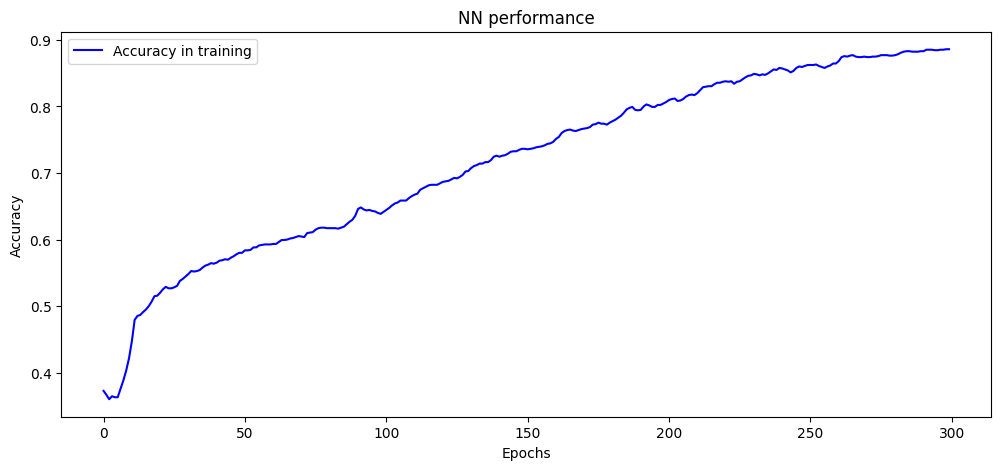

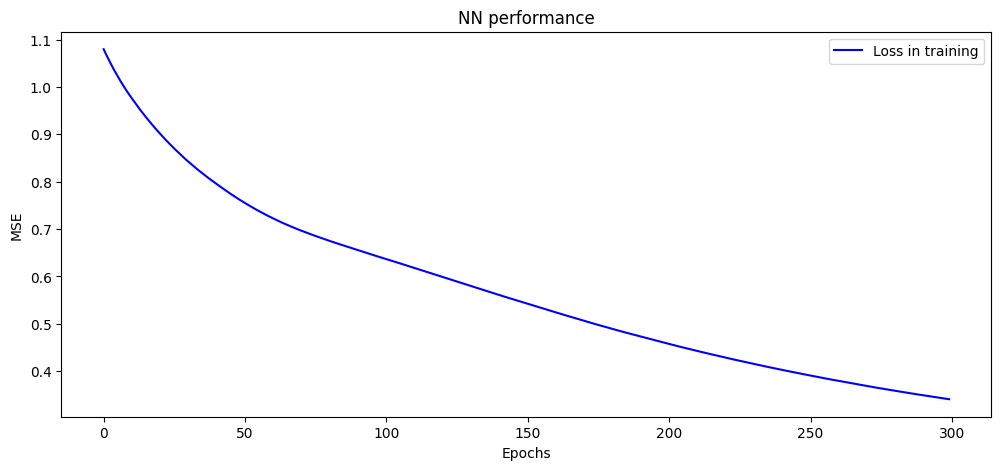

In [ ]:
# Training performance
training_acc = history.history['accuracy']
training_loss = history.history['loss']

epocs = np.arange(len(training_loss))

plt.figure(figsize = (12, 5))
plt.plot(epocs, training_acc, color = 'blue', label = 'Accuracy in training')
plt.title('NN performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()

plt.figure(figsize = (12, 5))
plt.plot(epocs, training_loss, color = 'blue', label = 'Loss in training')
plt.title('NN performance')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# Training performance
pt = 300
X1, X2 = np.meshgrid(np.linspace(-1, +1, pt), np.linspace(-1, +1, pt))
Ypp = model.predict(np.c_[X1.ravel(), X2.ravel()])    # Predict feature space
Ypp = np.argmax(Ypp, axis=1)     # Take class with highest probability
Ypp = Ypp.reshape(pt, pt)

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


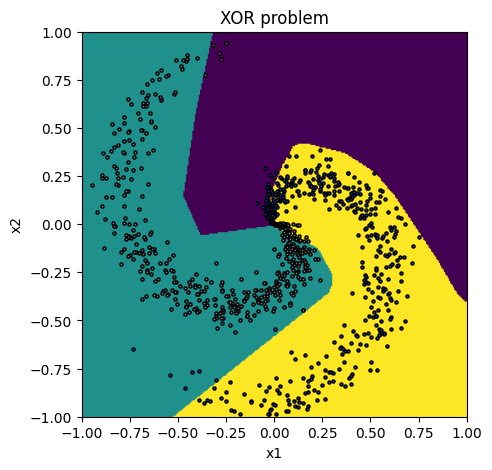

In [ ]:
# MLP
plt.figure(figsize=(5, 5))
plt.imshow(Ypp, extent=(X1.min(), X1.max(), X2.min(), X2.max()), origin='lower')

for i in range(1, int(max(Y)) + 1):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], color=np.random.rand(3,), s=5, edgecolor='k')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR problem')
plt.show()